In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
import numpy as np

def initialize_centroids(data, k):
##Randomly initialize the centroids from the data points."""
    centroids_idx = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[centroids_idx]
    return centroids

def compute_distances(data, centroids):
##Compute the distances between each data point and centroids."""
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return distances

def assign_clusters(distances):
##Assign each data point to the closest centroid."""
    return np.argmin(distances, axis=1)

def update_centroids(data, clusters, k):
##Update the centroids by computing the mean of the points in each cluster."""
    centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
    return centroids

def k_means(data, k, max_iterations=100):
##Implement the K-means clustering algorithm."""
    centroids = initialize_centroids(data, k)

    for _ in range(max_iterations):
        distances = compute_distances(data, centroids)
        clusters = assign_clusters(distances)
        new_centroids = update_centroids(data, clusters, k)

        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids

In [ ]:
data, true_labels = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
# Define the number of clusters (k) based on the problem
k = 4

# Perform K-means clustering
clusters, centroids = k_means(data_scaled, k)

# Compute the total within-cluster sum of squares
wcss = 0
for i in range(k):
    cluster_points = data_scaled[clusters == i]
    wcss += np.sum(np.square(cluster_points - centroids[i]))

print("Total within-cluster sum of squares:", wcss)

Total within-cluster sum of squares: 17.46619760906058


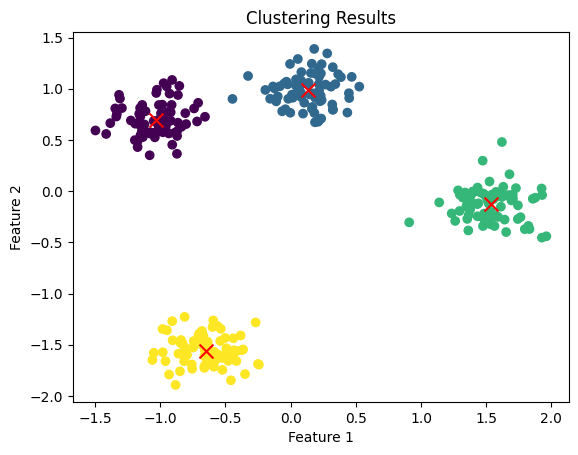

In [ ]:

plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Clustering Results")
plt.show()

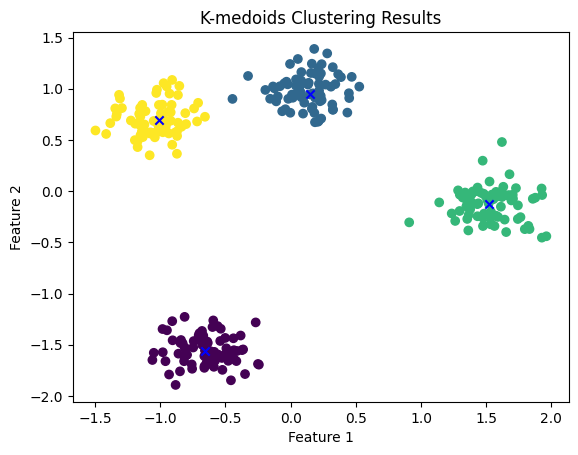

In [ ]:
import numpy as np

def initialize_medoids(data, k):
##Randomly initialize the medoids from the data points."""
    medoids_idx = np.random.choice(data.shape[0], k, replace=False)
    medoids = data[medoids_idx]
    return medoids

def compute_dissimilarities(data, medoids):
##Compute the dissimilarities between each data point and medoids."""
    dissimilarities = np.linalg.norm(data[:, np.newaxis] - medoids, axis=2)
    return dissimilarities

def assign_clusters(dissimilarities):
##Assign each data point to the closest medoid."""
    return np.argmin(dissimilarities, axis=1)

def update_medoids(data, clusters, k):
##Update the medoids by selecting the data point with the minimum sum of dissimilarities in each cluster."""
    new_medoids = []
    for i in range(k):
        cluster_data = data[clusters == i]
        cluster_dissimilarities = np.sum(np.linalg.norm(cluster_data[:, np.newaxis] - cluster_data, axis=2), axis=1)
        new_medoids.append(cluster_data[np.argmin(cluster_dissimilarities)])
    return np.array(new_medoids)

def k_medoids(data, k, max_iterations=100):
##Implement the K-medoids clustering algorithm
    medoids = initialize_medoids(data, k)

    for _ in range(max_iterations):
        dissimilarities = compute_dissimilarities(data, medoids)
        clusters = assign_clusters(dissimilarities)
        new_medoids = update_medoids(data, clusters, k)

        if np.all(medoids == new_medoids):
            break

        medoids = new_medoids

    return clusters, medoids
    # Visualize the clusters for K-medoids
medoids, clusters_medoids = k_medoids(data_scaled, k)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters_medoids, cmap='viridis')
plt.scatter(medoids[:, 0], medoids[:, 1], c='blue', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-medoids Clustering Results')
plt.show()